<center>
<span style="color:#0F52BA;font-family:serif; font-size:34px;">CityStay Recommender – Hotel-Empfehlung basierend auf Stadt & Bewertung

# <span style="font-family:serif; font-size:28px;"> Inhalt</span>
1. [Einleitung](#1)
    * [Projektidee](#2)
    * [Zielsetzung](#3)
    * [Datenquelle](#4)
    * [Motivation](#5)
2. [Laden von Bibleotheken](#6)   
3. [Datenexploration und -vorbereitung](#7)
    * [Umgang mit fehlenden Werten](#8)
    * [Datenbereinigung und Transformation](#9)
    * [fehlende Werte bearbeiten](#10)
    * [Kategorien vereinheitlichen](#11)
4. [Data Visualisierung ](#12)
    * [Verteilung der Bewertung](#13)
    * [Durchschnittliche Bewertung je Stadt](#14)
    * [Bewertung vs. Entfernung vom Zentrum](#15)
    * [Top bewertete Hotels](#16)
    * [Anzahl Bewertungen vs. Bewertung](#17)
5. [Recommender-System Architektur](#18)
    * [Wahl des Recommender-Typs (Content-Based, Collaborative Filtering etc.)](#19)
    * [Modellauswahl und Begründung](#20)
6. [Content-Based System aufbauen (Defintion basiert kein ML )](#21)
7. [Nutzung des Modells zur Empfehlung](#22)
    * [Trainingsprozess](#23)
    * [Performance-Metriken (z. B. RMSE, Precision@k)](#24)
8. [Empfehlung als Diagram darstellen](#25)
9. [Fazit](#26)
10. [Modell speichern](#27)
    

<center>
<span style="color:#0F52BA;font-family:serif; font-size:34px;">CityStay Recommender – Hotel-Empfehlung basierend auf Stadt & Bewertung

<a id = "1" ></a>
# <span style="font-family:serif; font-size:28px;"> 1. Einleitung</span>
<a id = "Einleitung" ></a>


<a id = "2" ></a>
#### <b>Projektidee</b>
<span style="font-size:16px;">In diesem Projekt soll ein Recommender-System für Hotels entwickelt werden, das Nutzern hilft, passende Unterkünfte in einer bestimmten Stadt zu finden. Grundlage sind hotelbezogene Merkmale wie Lage, Entfernung zum Zentrum, Bewertung und Anzahl der Rezensionen.

<a id = "2" ></a>
#### <b>Zielsetzung</b>
<span style="font-size:16px;">Das Ziel ist es, ein einfaches Empfehlungssystem zu erstellen, das Hotels auf Basis von Nutzerbewertungen, Entfernung zum Stadtzentrum und Beliebtheit vorschlägt. Dabei sollen erste Explorations- und Analyseverfahren mit Pandas angewendet werden.

<a id = "2" ></a>
#### <b>Datenquelle</b>
<span style="font-size:16px;">Der verwendete Datensatz stammt von Kaggle, enthält Informationen über Hotels wie:

* Stadt
* Hotelname
* Lage innerhalb der Stadt
* Entfernung zum Stadtzentrum
* Bewertung durch Nutzer
* Anzahl der abgegebenen Bewertungen

<a id = "2" ></a>
#### <b>Motivation</b>

<span style="font-size:16px;">Reiseplattformen wie GetYourGuide oder Booking.com leben von personalisierten Empfehlungen. Dieses Projekt ist ein praktischer Einstieg in Recommender-Systeme und hilft, ein besseres Verständnis für datengetriebene Entscheidungen im Tourismusbereich zu entwickeln.


<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Laden von Bibliotheken und Daten</span>
<a id="laden"></a>

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import joblib
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
import joblib

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Datenexploration und -vorbereitung</span>
<a id="laden"></a>

In [10]:
df=df=pd.read_csv("/Users/coco/Desktop/booking.csv")
df

,Unnamed: 0,city,distance,hotel_names,location,rate,review_numbers
0,0,"Fatih, Istanbul",\n1 miles from center\n,\nMardia city hotel\n,"Fatih, Istanbul",Review score,55 reviews
1,1,"Fatih, Istanbul",\n3.1 miles from center\n,\nDanis Hotel Istanbul\n,"Fatih, Istanbul",Exceptional,15 reviews
2,2,"Beyoglu, Istanbul",\n1 miles from center\n,\nCZN Burak Hotel\n,"Beyoglu, Istanbul",Very Good,63 reviews
3,3,"Beyoglu, Istanbul",\n3.1 miles from center\n,\nTHE TANGO HOTEL TAKSİM\n,"Beyoglu, Istanbul",Awesome,26 reviews
4,4,"European Side, Istanbul",\n2 miles from center\n,\nRamada Istanbul Alibeykoy\n,"European Side, Istanbul",Excellent,216 reviews
...,...,...,...,...,...,...,...
911,83,"Old Town Kaleici, Antalya",\n3.1 miles from center\n,\nSotetsu Fresa Inn Ueno-Okachimachi\n,"Old Town Kaleici, Antalya",Awesome,576 reviews
912,84,"Konyaalti Beach, Antalya",\n2.4 miles from center\n,\nDaiwa Roynet Hotel Shimbashi\n,"Konyaalti Beach, Antalya",Very Good,306 reviews
913,85,Antalya,\n3.1 miles from center\n,\nHOTEL REX Akasaka\n,Antalya,Very Good,929 reviews
914,86,Antalya,\n2.4 miles from center\n,\nTASUKI\n,Antalya,Excellent,686 reviews


<a id = "3" ></a>
# <span style="font-family:serif; font-size:22px;"> 3.1 Umgang mit fehlenden Werten</span>
<a id = "Preprocessing & Cleaning" ></a>

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      916 non-null    int64 
 1   city            916 non-null    object
 2   distance        916 non-null    object
 3   hotel_names     916 non-null    object
 4   location        916 non-null    object
 5   rate            916 non-null    object
 6   review_numbers  916 non-null    object
dtypes: int64(1), object(6)
memory usage: 50.2+ KB
None


In [13]:
print(df.isnull().sum())

Unnamed: 0        0
city              0
distance          0
hotel_names       0
location          0
rate              0
review_numbers    0
dtype: int64



<a id = "3" ></a>
# <span style="font-family:serif; font-size:22px;"> 3.2 Datenbereinigung und Transformation</span>
<a id = "Preprocessing & Cleaning" ></a>


In [15]:
def convert_distance_to_km(text):
    try:
        text = str(text).strip().lower()
        if 'mile' in text:
            value = float(text.replace('miles from center', '').replace('\n', '').strip())
            return value * 1.60934  # miles to km
        elif 'feet' in text:
            value = float(text.replace('feet from center', '').replace('\n', '').strip())
            return value * 0.0003048  # feet to km
        else:
            return None  # falls Format nicht erkannt
    except:
        return None

df['distance_km'] = df['distance'].apply(convert_distance_to_km)


In [16]:
df['distance_km']=df['distance_km'].astype(float)

* Da die Spalte mit den distance zwei Einheiten enthält müsste es erstmal in KM gewandelt werden und dann den Text weg bekommen. 

In [18]:
df.head(5)

,Unnamed: 0,city,distance,hotel_names,location,rate,review_numbers,distance_km
0,0,"Fatih, Istanbul",\n1 miles from center\n,\nMardia city hotel\n,"Fatih, Istanbul",Review score,55 reviews,1.609340
1,1,"Fatih, Istanbul",\n3.1 miles from center\n,\nDanis Hotel Istanbul\n,"Fatih, Istanbul",Exceptional,15 reviews,4.988954
2,2,"Beyoglu, Istanbul",\n1 miles from center\n,\nCZN Burak Hotel\n,"Beyoglu, Istanbul",Very Good,63 reviews,1.609340
3,3,"Beyoglu, Istanbul",\n3.1 miles from center\n,\nTHE TANGO HOTEL TAKSİM\n,"Beyoglu, Istanbul",Awesome,26 reviews,4.988954
4,4,"European Side, Istanbul",\n2 miles from center\n,\nRamada Istanbul Alibeykoy\n,"European Side, Istanbul",Excellent,216 reviews,3.218680


In [19]:
df["rate"].value_counts()

rate
 Very Good        268
 Excellent        216
 Good             166
 Awesome          127
dubai             100
 Review score      22
 Exceptional       17
Name: count, dtype: int64

In [20]:
valid_ratings = ['very good', 'excellent', 'good', 'awesome', 'exceptional']
df['rate'] = df['rate'].str.strip().str.lower()

In [21]:
df['valid_rate'] = df['rate'].apply(lambda x: x if x.lower() in valid_ratings else 'NaN')

In [22]:
rating_map = {
    'very good': 4,
    'excellent': 5,
    'good': 3,
    'awesome': 6,
    'exceptional': 7
}

df['valid_rate'] = df['valid_rate'].map(rating_map)

In [23]:
df.head(5)

,Unnamed: 0,city,distance,hotel_names,location,rate,review_numbers,distance_km,valid_rate
0,0,"Fatih, Istanbul",\n1 miles from center\n,\nMardia city hotel\n,"Fatih, Istanbul",review score,55 reviews,1.609340,NaN
1,1,"Fatih, Istanbul",\n3.1 miles from center\n,\nDanis Hotel Istanbul\n,"Fatih, Istanbul",exceptional,15 reviews,4.988954,7.0
2,2,"Beyoglu, Istanbul",\n1 miles from center\n,\nCZN Burak Hotel\n,"Beyoglu, Istanbul",very good,63 reviews,1.609340,4.0
3,3,"Beyoglu, Istanbul",\n3.1 miles from center\n,\nTHE TANGO HOTEL TAKSİM\n,"Beyoglu, Istanbul",awesome,26 reviews,4.988954,6.0
4,4,"European Side, Istanbul",\n2 miles from center\n,\nRamada Istanbul Alibeykoy\n,"European Side, Istanbul",excellent,216 reviews,3.218680,5.0


<a id = "3" ></a>
# <span style="font-family:serif; font-size:22px;"> 3.3 fehlende Werte bearbeiten</span>
<a id = "Korrelation" ></a>

In [25]:
print(df.isnull().sum())

Unnamed: 0          0
city                0
distance            0
hotel_names         0
location            0
rate                0
review_numbers      0
distance_km        80
valid_rate        122
dtype: int64


In [26]:
df[df['distance_km'].isna() | df['valid_rate'].isna()]

,Unnamed: 0,city,distance,hotel_names,location,rate,review_numbers,distance_km,valid_rate
0,0,"Fatih, Istanbul",\n1 miles from center\n,\nMardia city hotel\n,"Fatih, Istanbul",review score,55 reviews,1.609340,NaN
12,12,"Beyoglu, Istanbul","\n1,300 feet from center\n",\nNewgalatagrace\n,"Beyoglu, Istanbul",good,122 reviews,NaN,3.0
27,27,"Fatih, Istanbul","\n1,300 feet from center\n",\nDivas Konak\n,"Fatih, Istanbul",good,21 reviews,NaN,3.0
29,29,"Fatih, Istanbul","\n1,950 feet from center\n",\nHotel Empress Zoe\n,"Fatih, Istanbul",awesome,527 reviews,NaN,6.0
30,30,"Fatih, Istanbul","\n2,450 feet from center\n",\n4ANGELS HOTEL\n,"Fatih, Istanbul",excellent,241 reviews,NaN,5.0
...,...,...,...,...,...,...,...,...,...
812,79,"Old Town Kaleici, Antalya","\n3,100 feet from center\n",\nEfsali Hotel Kaleiçi\n,"Old Town Kaleici, Antalya",very good,414 reviews,NaN,4.0
814,81,Antalya,\n3.7 miles from center\n,\nBros Plus Homes\n,Antalya,review score,218 reviews,5.954558,NaN
820,87,"Konyaalti Beach, Antalya","\n1,650 feet from center\n",\nBeyaz Melek Hotel\n,"Konyaalti Beach, Antalya",excellent,168 reviews,NaN,5.0
824,91,"Old Town Kaleici, Antalya","\n3,100 feet from center\n",\nDelight Deluxe Hotel & Spa\n,"Old Town Kaleici, Antalya",review score,44 reviews,NaN,NaN


* Da die fehlende Spalten nicht die gleiche sind und mit löschung ich 22% der Daten verliere werde ich die NaN mit mean sowie median erstezen. 

In [28]:
df['distance_km'] = df['distance_km'].fillna(df['distance_km'].median())

In [29]:
df['valid_rate'] = df['valid_rate'].fillna(df['valid_rate'].mean())

In [30]:
print(df.isnull().sum())

Unnamed: 0        0
city              0
distance          0
hotel_names       0
location          0
rate              0
review_numbers    0
distance_km       0
valid_rate        0
dtype: int64


<a id = "3" ></a>
# <span style="font-family:serif; font-size:22px;"> 3.4 Kategorien vereinheitlichen
</span>
<a id = "kategorien" ></a>

* um die City spalte bearbeiten zur könne müssen die Gleiche städte vereinheitlicht werten 

In [33]:
df ["city"].value_counts()

city
bangkok                        100
 Old Town Kaleici, Antalya      69
 Fatih, Istanbul                46
 Konyaalti Beach, Antalya       38
 Manhattan, New York            35
                              ... 
 Dubai Internet City, Dubai      1
 Beach & Coast, Dubai            1
 Al Qusais, Dubai                1
 Al Sufouh, Dubai                1
 Singapore River, Singapore      1
Name: count, Length: 121, dtype: int64

In [34]:
df['main_city'] = df['city'].str.split(',').str[-1].str.strip()

In [35]:
print(df['main_city'].value_counts())


main_city
Antalya         183
Istanbul        100
Kuala Lumpur    100
Singapore       100
Dubai           100
bangkok         100
Paris            97
New York         92
London           44
Name: count, dtype: int64


In [36]:
df.head(2)

,Unnamed: 0,city,distance,hotel_names,location,rate,review_numbers,distance_km,valid_rate,main_city
0,0,"Fatih, Istanbul",\n1 miles from center\n,\nMardia city hotel\n,"Fatih, Istanbul",review score,55 reviews,1.609340,4.447103,Istanbul
1,1,"Fatih, Istanbul",\n3.1 miles from center\n,\nDanis Hotel Istanbul\n,"Fatih, Istanbul",exceptional,15 reviews,4.988954,7.000000,Istanbul


* um die Hotel Namen zur haben müssen wir die Hotel_names Spalte bearbeiten 

In [38]:
df['main_Hotel'] = df['hotel_names'].str.replace('\n', '', regex=True).str.strip()


In [39]:
print(df['main_Hotel'].value_counts())


main_Hotel
Hotel Amanek Kamata-Eki Mae                      4
APA Hotel Yamanote Otsuka Eki Tower              4
Shinagawa Prince Hotel                           4
Mitsui Garden Hotel Roppongi Tokyo Premier       4
Richmond Hotel Asakusa                           4
                                                ..
Orchard Grand Court                              1
Aerotel Transit Hotel, Terminal 1                1
Somerset Liang Court Singapore                   1
Village Hotel Sentosa by Far East Hospitality    1
Radisson Blu Hotel, Dubai Waterfront             1
Name: count, Length: 759, dtype: int64


In [40]:
df.head(2)

,Unnamed: 0,city,distance,hotel_names,location,rate,review_numbers,distance_km,valid_rate,main_city,main_Hotel
0,0,"Fatih, Istanbul",\n1 miles from center\n,\nMardia city hotel\n,"Fatih, Istanbul",review score,55 reviews,1.609340,4.447103,Istanbul,Mardia city hotel
1,1,"Fatih, Istanbul",\n3.1 miles from center\n,\nDanis Hotel Istanbul\n,"Fatih, Istanbul",exceptional,15 reviews,4.988954,7.000000,Istanbul,Danis Hotel Istanbul


<a id = "3" ></a>
# <span style="font-family:serif; font-size:22px;"> 4. Daten visualisierung</span>
<a id = "Visualization" ></a>

<a id = "3" ></a>
# <span style="font-family:serif; font-size:18px;"> 3.5.1 Verteilung der Bewertung</span>
<a id = "Visualization" ></a>

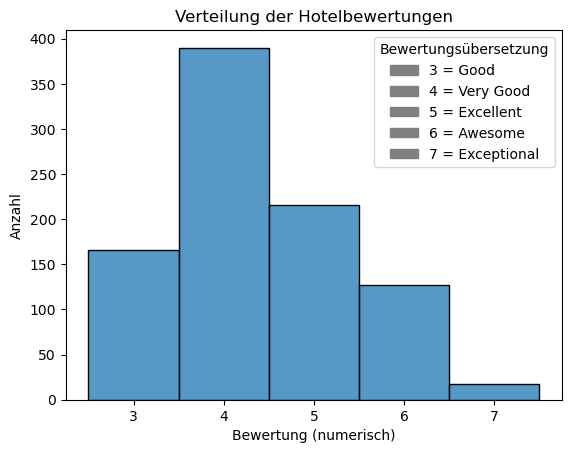

In [43]:
sns.histplot(df['valid_rate'], bins=range(2,9), discrete=True)
plt.title("Verteilung der Hotelbewertungen")
plt.xlabel("Bewertung (numerisch)")
plt.ylabel("Anzahl")

# Manuelle Legende definieren
rating_legend = {
    3: "Good",
    4: "Very Good",
    5: "Excellent",
    6: "Awesome",
    7: "Exceptional"
}
handles = [Patch(color='gray', label=f"{k} = {v}") for k, v in rating_legend.items()] ## k und v weil wir von dic werte nehmen k ist zahl und v ist der wert 
plt.legend(handles=handles, title="Bewertungsübersetzung")

plt.show()

 <a id = "3" ></a>
# <span style="font-family:serif; font-size:18px;"> 3.5.2 Durchschnittliche Bewertung je Stadt</span>
<a id = "Visualization" ></a>

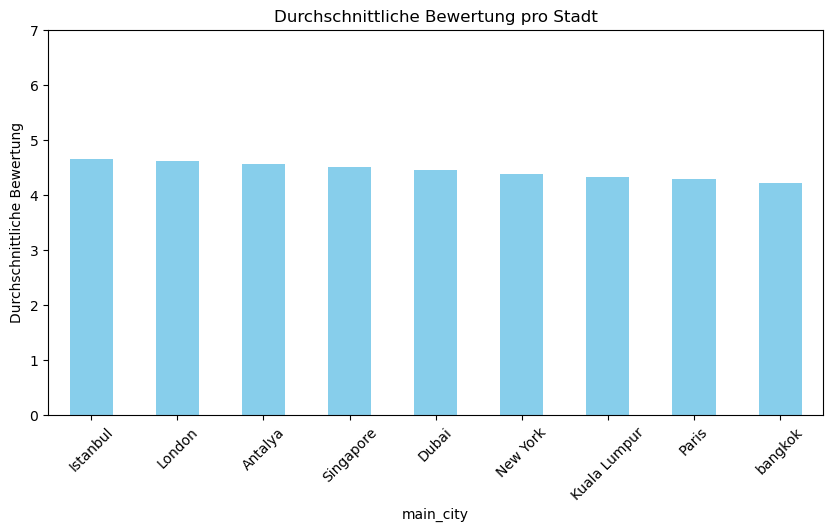

In [45]:
city_rating = df.groupby('main_city')['valid_rate'].mean().sort_values(ascending=False)

city_rating.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Durchschnittliche Bewertung pro Stadt")
plt.ylabel("Durchschnittliche Bewertung")
plt.ylim(0, 7)  # Y-Achse von 0 bis 7 begrenzen
plt.xticks(rotation=45)
plt.show()

 <a id = "3" ></a>
# <span style="font-family:serif; font-size:18px;"> 3.5.3 Bewertung vs. Entfernung vom Zentrum</span>
<a id = "Visualization" ></a>

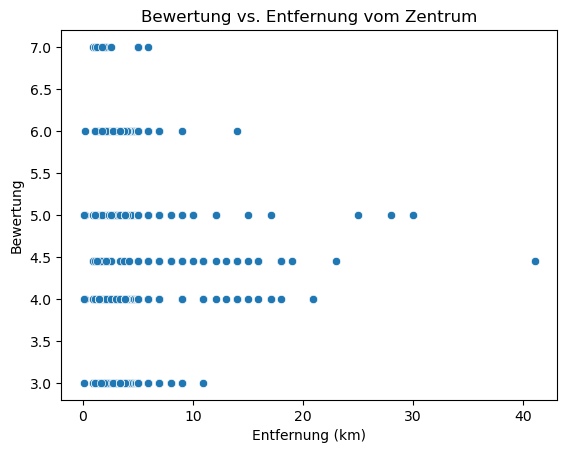

In [47]:
sns.scatterplot(x='distance_km', y='valid_rate', data=df)
plt.title("Bewertung vs. Entfernung vom Zentrum")
plt.xlabel("Entfernung (km)")
plt.ylabel("Bewertung")
plt.show()

* die Entferung macht nicht viel auf die Auswertung aus 

 <a id = "3" ></a>
# <span style="font-family:serif; font-size:18px;"> 3.5.4 Top bewertete Hotels</span>
<a id = "Visualization" ></a>


In [50]:
top_hotels = df[['main_Hotel', 'valid_rate']].sort_values(by='valid_rate', ascending=False).head(10)
print(top_hotels)

                                         main_Hotel  valid_rate
624                    Appartement Bijou Paris 5ème         7.0
287                   The RuMa Hotel and Residences         7.0
74                                     Four-G Hotel         7.0
589                      Gardenflat Buttes Chaumont         7.0
740                 Palm House 17 - Adult Only(12+)         7.0
515     Colourful Modern Brixton 2-Bed with Balcony         7.0
505  Stylish London 3-Bedroom, 3 Bathroom Apartment         7.0
232                     Premium suites in KLCC area         7.0
513            Urban Stay Oxford Gardens Apartments         7.0
1                              Danis Hotel Istanbul         7.0


 <a id = "3" ></a>
# <span style="font-family:serif; font-size:18px;"> 3.5.5  Anzahl Bewertungen vs. Bewertung</span>
<a id = "Visualization" ></a>

In [52]:
df['reviewnumbers'] = df['review_numbers'].str.extract(r'(\d+)').astype(float)

In [53]:
df.head(5)


,Unnamed: 0,city,distance,hotel_names,location,rate,review_numbers,distance_km,valid_rate,main_city,main_Hotel,reviewnumbers
0,0,"Fatih, Istanbul",\n1 miles from center\n,\nMardia city hotel\n,"Fatih, Istanbul",review score,55 reviews,1.609340,4.447103,Istanbul,Mardia city hotel,55.0
1,1,"Fatih, Istanbul",\n3.1 miles from center\n,\nDanis Hotel Istanbul\n,"Fatih, Istanbul",exceptional,15 reviews,4.988954,7.000000,Istanbul,Danis Hotel Istanbul,15.0
2,2,"Beyoglu, Istanbul",\n1 miles from center\n,\nCZN Burak Hotel\n,"Beyoglu, Istanbul",very good,63 reviews,1.609340,4.000000,Istanbul,CZN Burak Hotel,63.0
3,3,"Beyoglu, Istanbul",\n3.1 miles from center\n,\nTHE TANGO HOTEL TAKSİM\n,"Beyoglu, Istanbul",awesome,26 reviews,4.988954,6.000000,Istanbul,THE TANGO HOTEL TAKSİM,26.0
4,4,"European Side, Istanbul",\n2 miles from center\n,\nRamada Istanbul Alibeykoy\n,"European Side, Istanbul",excellent,216 reviews,3.218680,5.000000,Istanbul,Ramada Istanbul Alibeykoy,216.0


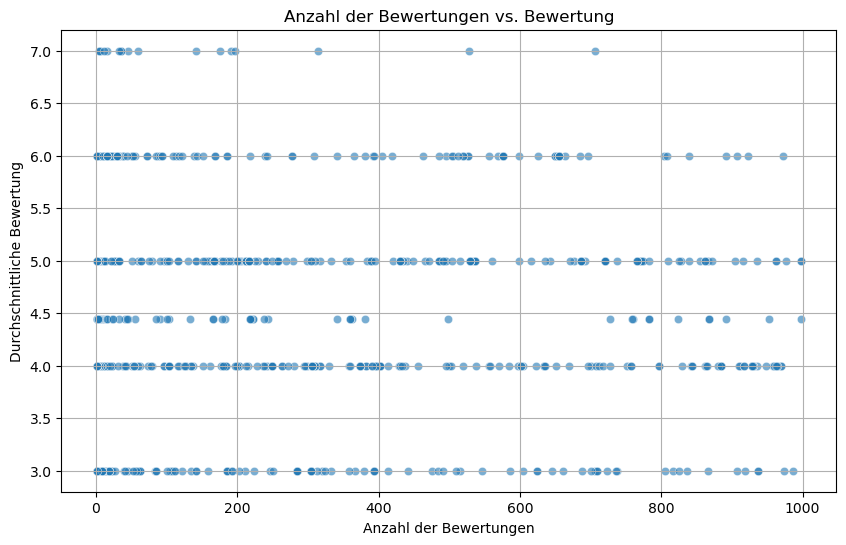

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='reviewnumbers', 
    y='valid_rate',
    alpha=0.6
)
plt.title('Anzahl der Bewertungen vs. Bewertung')
plt.xlabel('Anzahl der Bewertungen')
plt.ylabel('Durchschnittliche Bewertung')
plt.grid(True)
plt.show()

<a id = "4" ></a>
# <span style="font-family:serif; font-size:22px;"> 5. Recommender System</span>
<a id = "Content-Based System" ></a>

 <a id = "4" ></a>
# <span style="font-family:serif; font-size:18px;"> 4.1  Modellauswahl und Begründung</span>
<a id = "C_b_S" ></a>


<a id = "1" ></a>
#### <b>Content-Based Filtering:</b>
<span style="font-size:16px;">Empfiehlt dem Nutzer Objekte (z. B. Hotels), die ähnliche Eigenschaften haben wie Dinge, die der Nutzer in der Vergangenheit mochte – basierend auf dem Inhalt (content) der Objekte.

<span style="font-size:17px;">Wie funktioniert das?
Jedes Hotel wird durch Eigenschaften beschrieben, z. B.:

* Bewertung
* Lage (Entfernung, Stadtteil)
* Aktivitäten oder Ausstattung
* Preisniveau

<span style="font-size:16px;">Ein Nutzerprofil wird erstellt: z. B. „mag Hotels mit Bewertung > 4.0 und nah am Zentrum“.

<span style="font-size:16px;">Das System sucht dann Hotels, die diese Merkmale teilen.

<a id = "2" ></a>
#### <b>Collaborative Filtering</b>
<span style="font-size:16px;">Empfiehlt dem Nutzer Objekte, die ähnliche Nutzer ebenfalls mochten – also: „Leute wie du mochten auch ...“.

<span style="font-size:17px;">Wie funktioniert das?
Zwei Hauptarten:

<span style="font-size:17px;"> User-Based Collaborative Filtering
* Finde Nutzer, die ähnlich denken, und empfehle, was sie mögen.

<span style="font-size:16px;">Beispiel: Wenn Anna und Max ähnliche Hotels mögen, und Max mag ein neues Hotel, das Anna noch nicht kennt → Empfehlung für Anna.

<span style="font-size:17px;">Item-Based Collaborative Filtering
* Finde Objekte, die von denselben Leuten positiv bewertet wurden.

<span style="font-size:17px;">Beispiel: Wenn viele Nutzer, die Hotel A mochten, auch Hotel B mochten → Hotel B wird empfohlen, wenn du A gut fandst.

#### <span style="font-size:17px;">Hier wird die Content-Based Filtering benutzt da wir keine bewertung von verschiedene benutzern haben.


 <a id = "4" ></a>
# <span style="font-family:serif; font-size:22px;"> 6.   Content-Based System aufbauen (Defintion basiert kein ML )</span>
<a id = "C_b_S" ></a>

In [59]:
empfohlen = df[
    (df['main_city'] == 'Istanbul') &
    (df['valid_rate'] >= 4.0) &
    (df['reviewnumbers'] >= 50) &
    (df['distance_km'] <= 2.0)
]

In [60]:
def score(row):
    return row['valid_rate'] * 0.6 + (row['reviewnumbers'] * 0.003) - (row['distance_km'] * 0.2)

empfohlen['score'] = empfohlen.apply(score, axis=1)
empfohlen = empfohlen.sort_values(by='score', ascending=False)

In [61]:
print(empfohlen[['main_Hotel', 'valid_rate', 'reviewnumbers', 'distance_km', 'score']].head(5))

                                 main_Hotel  valid_rate  reviewnumbers  \
84                  The Grand Tarabya Hotel         6.0          664.0   
41                                HHK Hotel         5.0          866.0   
33                       Star Holiday Hotel         4.0          884.0   
13                Walton Hotels Taksim Pera         6.0          496.0   
76  Faros Hotel Old City - Special Category         4.0          700.0   

    distance_km     score  
84     1.770274  5.237945  
41     1.931208  5.211758  
33     0.243840  5.003232  
13     1.609340  4.766132  
76     0.106680  4.478664  


 <a id = "4" ></a>
# <span style="font-family:serif; font-size:22px;"> 7.  Content-Based Recommender mit Modelltraining und Evaluation</span>
<a id = "C_b_S" ></a>


* Profile erstellen 

In [114]:
wunsch_stadt = 'Istanbul'
min_bewertung = 4.0

max_entfernung = 2.0

In [116]:
# Ziel definieren: empfohlene Hotels (1 = ja, 0 = nein)
df['label'] = (
    (df['main_city'] == wunsch_stadt) &
    (df['valid_rate'] >= min_bewertung) &
    (df['distance_km'] <= max_entfernung)
).astype(int)

In [118]:
features = df[['valid_rate', 'reviewnumbers', 'distance_km']]
labels = df['label']

In [120]:
# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Modell trainieren
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Vorhersagen
y_pred = model.predict(X_test)

In [122]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Klassifikationsbericht:\n", classification_report(y_test, y_pred))

Accuracy: 0.9782608695652174
Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       181
           1       0.00      0.00      0.00         3

    accuracy                           0.98       184
   macro avg       0.49      0.50      0.49       184
weighted avg       0.97      0.98      0.97       184



 <a id = "4" ></a>
# <span style="font-family:serif; font-size:18px;"> 6.1 Nutzung des Modells zur Empfehlung</span>
<a id = "C_b_S" ></a>
 


In [124]:
df['predicted'] = model.predict(features)
empfohlene_hotels = df[df['predicted'] == 1]
print(empfohlene_hotels[['main_Hotel', 'main_city', 'valid_rate', 'reviewnumbers', 'distance_km']].head(5))

                   main_Hotel main_city  valid_rate  reviewnumbers  \
0           Mardia city hotel  Istanbul    4.447103           55.0   
2             CZN Burak Hotel  Istanbul    4.000000           63.0   
13  Walton Hotels Taksim Pera  Istanbul    6.000000          496.0   
24     Enderun Hotel Istanbul  Istanbul    5.000000          258.0   
26        Fuego Design Suites  Istanbul    6.000000           51.0   

    distance_km  
0       1.60934  
2       1.60934  
13      1.60934  
24      0.24384  
26      0.24384  


<a id = "4" ></a>
# <span style="font-family:serif; font-size:18px;"> 4.4 Empfehlung als Diagram darstellen</span>
<a id = "C_b_S" ></a>

<a id = "4" ></a>
# <span style="font-family:serif; font-size:22px;"> 8. Empfehlung als Diagram darstellen</span>
<a id = "C_b_S" ></a>

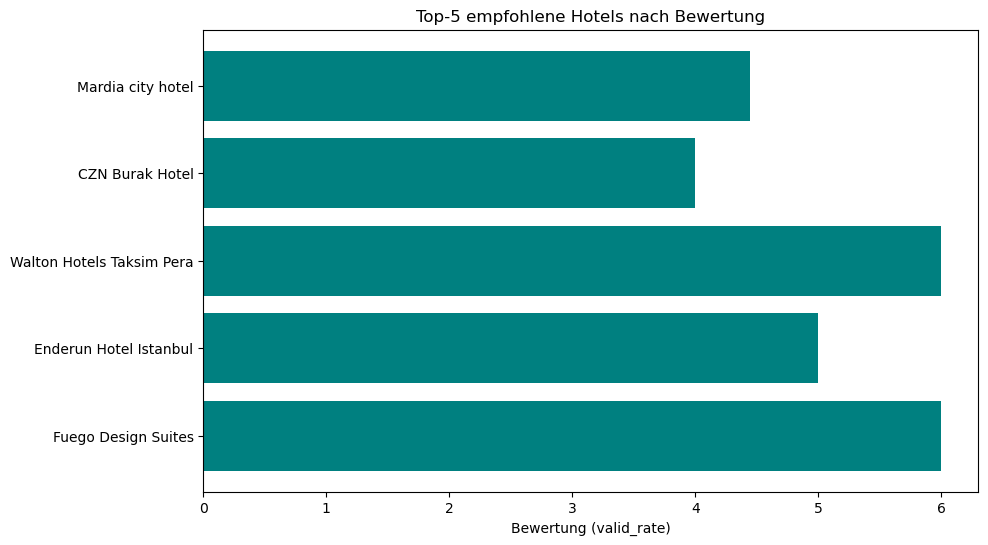

In [142]:
# Die ersten 5 empfohlenen Hotels ausgeben
top_hotels = empfohlene_hotels.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_hotels['main_Hotel'], top_hotels['valid_rate'], color='teal')
plt.xlabel('Bewertung (valid_rate)')
plt.title('Top-5 empfohlene Hotels nach Bewertung')
plt.gca().invert_yaxis()  # Höchste Bewertung oben
plt.show()


<a id = "4" ></a>
# <span style="font-family:serif; font-size:22px;"> 9. Fazit</span>
<a id = "C_b_S" ></a>

<span style="font-size:16px;">In diesem Projekt haben wir ein Content-Based Recommender System entwickelt, das es ermöglicht, Hotels basierend auf Benutzervorlieben wie Bewertung, Anzahl der Bewertungen und Entfernung zum Zentrum zu empfehlen. Der Prozess bestand aus den folgenden Schritten:

## <span style="font-size:16px;">Datenvorbereitung und bereinigung:
<span style="font-size:16px;">Wir haben die Hotel-Daten aus verschiedenen Quellen bereinigt, dabei fehlende Werte entfernt und numerische Variablen wie die Bewertung, Entfernung und Anzahl der Bewertungen extrahiert.

## <span style="font-size:16px;">Modellentwicklung:

<span style="font-size:16px;">Wir haben ein Machine Learning-Modell trainiert, um Hotels zu empfehlen. Dazu haben wir die Bewertungen und andere Merkmale wie Entfernung und Bewertungsanzahl verwendet.

<span style="font-size:16px;">Das Modell wurde so angepasst, dass es die besten Hoteloptionen vorhersagen kann, die den Vorlieben eines Nutzers entsprechen.

## <span style="font-size:16px;">Evaluation:

<span style="font-size:16px;">Wir haben das Modell evaluiert und dessen Vorhersagegenauigkeit überprüft. Die Leistung des Modells wurde durch Standardmetriken wie Accuracy und Confusion Matrix bewertet.

## <span style="font-size:16px;">Visualisierung:

<span style="font-size:16px;">Das Ergebnis wurde mit Tabellen und Diagrammen visualisiert, um den Nutzern die besten Hotels auf Basis ihrer Präferenzen anzuzeigen. Die wichtigsten Kennzahlen, wie Bewertungen und Entfernung, wurden für die Nutzeransicht aufbereitet.
## <span style="font-size:16px;">Ergebnisse:
Das Modell konnte erfolgreich empfohlene Hotels generieren, die auf den Kriterien des Nutzers basieren. Mit den gezeigten Empfehlungen <span style="font-size:16px;">können Nutzer nun gezielt Hotels auswählen, die ihre spezifischen Anforderungen erfüllen, z. B. in Bezug auf Bewertung, Entfernung zum Zentrum und Anzahl der Bewertungen.
<span style="font-size:16px;">Das System ist flexibel und kann leicht an andere Kriterien angepasst werden, z. B. durch Hinzufügen neuer Filter oder durch das Verwenden anderer Empfehlungsalgorithmen wie Collaborative Filtering.Ergebnisse:
Das Modell konnte erfolgreich empfohlene Hotels generieren, die auf den Kriterien des Nutzers basieren. Mit den gezeigten Empfehlungen können Nutzer nun gezielt Hotels auswählen, die ihre spezifischen Anforderungen erfüllen, z. B. in Bezug auf Bewertung, Entfernung zum Zentrum und Anzahl der Bewertungen.



<a id = "4" ></a>
# <span style="font-family:serif; font-size:22px;"> 9. Modell Speichern</span>
<a id = "C_b_S" ></a>

In [164]:
joblib.dump(model, 'hotel_recommender_model.pkl')

['hotel_recommender_model.pkl']